In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

2.6.4
sys.version_info(major=3, minor=7, micro=12, releaselevel='final', serial=0)
matplotlib 3.5.2
numpy 1.21.6
pandas 1.3.5
sklearn 1.0.2
tensorflow 2.6.4
keras.api._v2.keras 2.6.0


In [2]:
import tensorflow_datasets as tfds

dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True,
                          as_supervised=True)  # 有监督 会返回labels
train_dataset, test_dataset = dataset['train'], dataset['test']
print(info)

2022-08-03 16:19:37.952832: W tensorflow/core/platform/cloud/google_auth_provider.cc:184] All attempts to get a Google authentication bearer token failed, returning an empty token. Retrieving token from files failed with "Not found: Could not locate the credentials file.". Retrieving token from GCE failed with "Failed precondition: Error executing an HTTP request: libcurl code 6 meaning 'Couldn't resolve host name', error details: Could not resolve host: metadata".


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling imdb_reviews-train.tfrecord...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling imdb_reviews-test.tfrecord...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling imdb_reviews-unsupervised.tfrecord...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


2022-08-03 16:21:55.757203: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-03 16:21:55.867375: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-03 16:21:55.868290: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-03 16:21:55.870557: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

tfds.core.DatasetInfo(
    name='imdb_reviews',
    full_name='imdb_reviews/subwords8k/1.0.0',
    description="""
    Large Movie Review Dataset.
    This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training, and 25,000 for testing. There is additional unlabeled data for use as well.
    """,
    config_description="""
    Uses `tfds.deprecated.text.SubwordTextEncoder` with 8k vocab size
    """,
    homepage='http://ai.stanford.edu/~amaas/data/sentiment/',
    data_path='/root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0',
    download_size=80.23 MiB,
    dataset_size=54.72 MiB,
    features=FeaturesDict({
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
        'text': Text(shape=(None,), dtype=tf.int64, encoder=<SubwordTextEncoder vocab_size=8185>),
    }),
    supervised_keys=('text', 'label'),
    disable_shuffling=False,
  

In [3]:
tokenizer = info.features['text'].encoder
print(type(tokenizer))
print(f'vocabulary size:{tokenizer.vocab_size}')

<class 'tensorflow_datasets.core.deprecated.text.subword_text_encoder.SubwordTextEncoder'>
vocabulary size:8185


In [4]:
for i in train_dataset.take(1):
    print(np.array(i[0]))
    print(i[0].numpy())
    print(len(i[0]))
    print(tokenizer.decode(np.array(i[0])))

[  62   18   41  604  927   65    3  644 7968   21   35 5096   36   11
   43 2948 5240  102   50  681 7862 1244    3 3266   29  122  640    2
   26   14  279  438   35   79  349  384   11 1991    3  492   79  122
  188  117   33 4047 4531   14   65 7968    8 1819 3947    3   62   27
    9   41  577 5044 2629 2552 7193 7961 3642    3   19  107 3903  225
   85  198   72    1 1512  738 2347  102 6245    8   85  308   79 6936
 7961   23 4981 8044    3 6429 7961 1141 1335 1848 4848   55 3601 4217
 8050    2    5   59 3831 1484 8040 7974  174 5773   22 5240  102   18
  247   26    4 3903 1612 3902  291   11    4   27   13   18 4092 4008
 7961    6  119  213 2774    3   12  258 2306   13   91   29  171   52
  229    2 1245 5790  995 7968    8   52 2948 5240 8039 7968    8   74
 1249    3   12  117 2438 1369  192   39 7975]
[  62   18   41  604  927   65    3  644 7968   21   35 5096   36   11
   43 2948 5240  102   50  681 7862 1244    3 3266   29  122  640    2
   26   14  279  438   35   79

2022-08-03 16:21:58.560563: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-08-03 16:21:58.610139: W tensorflow/core/kernels/data/cache_dataset_ops.cc:768] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


In [5]:
# subword level不可以去除标点符号
sample_string = 'Tensorflow is cool.'
# encode是变为index序列
tokenized_string = tokenizer.encode(sample_string)
print(f'Tokenized string is {tokenized_string}')
print(type(tokenized_string))
# decode解码为原来的字符串
original_string = tokenizer.decode(tokenized_string)
print(f'Original string is {original_string}')

Tokenized string is [6307, 2327, 2934, 7961, 9, 2724, 7975]
<class 'list'>
Original string is Tensorflow is cool.


In [6]:
# 对应关系
for token in tokenized_string:
    print(f'{token} -->{tokenizer.decode([token])}---{len(tokenizer.decode([token]))}')

6307 -->Ten---3
2327 -->sor---3
2934 -->flow---4
7961 --> ---1
9 -->is ---3
2724 -->cool---4
7975 -->.---1


In [7]:
print(train_dataset)
print('-' * 50)
print(test_dataset)

<PrefetchDataset shapes: ((None,), ()), types: (tf.int64, tf.int64)>
--------------------------------------------------
<PrefetchDataset shapes: ((None,), ()), types: (tf.int64, tf.int64)>


In [8]:
buffer_size = 10000
batch_size = 64
# 2.0版本代码 已弃用
# print(train_dataset.output_shapes)
# print(test_dataset.output_shapes)
# train_dataset = train_dataset.shuffle(buffer_size)
# train_dataset = train_dataset.padded_batch(batch_size, train_dataset.output_shapes)
# test_dataset = test_dataset.padded_batch(batch_size, test_dataset.output_shapes)
# 训练集的最大大小
padded_shapes = tf.compat.v1.data.get_output_shapes(train_dataset)
print(train_dataset)
print(padded_shapes)
# 测试集的最大大小
padded_shapes_test = tf.compat.v1.data.get_output_shapes(test_dataset)
print(padded_shapes_test)
print(test_dataset)
train_dataset = train_dataset.shuffle(buffer_size)
# padded_batch是分批并对每批数据分别做padding填充成每批的最大大小（每批大小不同）
train_dataset = train_dataset.padded_batch(batch_size,padded_shapes) 
test_dataset = test_dataset.padded_batch(batch_size,padded_shapes_test)
print(train_dataset)
print('-' * 50)
print(test_dataset)

<PrefetchDataset shapes: ((None,), ()), types: (tf.int64, tf.int64)>
(TensorShape([None]), TensorShape([]))
(TensorShape([None]), TensorShape([]))
<PrefetchDataset shapes: ((None,), ()), types: (tf.int64, tf.int64)>
<PaddedBatchDataset shapes: ((None, None), (None,)), types: (tf.int64, tf.int64)>
--------------------------------------------------
<PaddedBatchDataset shapes: ((None, None), (None,)), types: (tf.int64, tf.int64)>


In [9]:
for i in train_dataset.take(10):
    print(i)

(<tf.Tensor: shape=(64, 1547), dtype=int64, numpy=
array([[  12,   31,    7, ...,    0,    0,    0],
       [2593, 3629, 3023, ...,    0,    0,    0],
       [ 518, 1693,    1, ...,   33, 3473, 7975],
       ...,
       [  12,   31,    4, ...,    0,    0,    0],
       [ 324,  406,  327, ...,    0,    0,    0],
       [3431, 2791,   36, ...,    0,    0,    0]])>, <tf.Tensor: shape=(64,), dtype=int64, numpy=
array([1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1])>)
(<tf.Tensor: shape=(64, 1647), dtype=int64, numpy=
array([[2355, 6491, 5196, ...,    0,    0,    0],
       [  12,  270,   14, ...,    0,    0,    0],
       [2830, 7961,    7, ...,    0,    0,    0],
       ...,
       [5289,    2,  275, ...,    0,    0,    0],
       [  12, 2689,   36, ...,    0,    0,    0],
       [1566,  117, 1531, ...,    0,    0,    0]])>, <tf.Ten

2022-08-03 16:21:59.474276: W tensorflow/core/kernels/data/cache_dataset_ops.cc:768] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


In [10]:
vocab_size = tokenizer.vocab_size
embedding_dim = 16
bi_lstm_model = keras.models.Sequential([
    keras.layers.Embedding(vocab_size, embedding_dim),
    keras.layers.Bidirectional(
        keras.layers.LSTM(
            units=32, return_sequences=False)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'), ])
bi_lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print(bi_lstm_model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          130960    
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                12544     
_________________________________________________________________
dense (Dense)                (None, 32)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 145,617
Trainable params: 145,617
Non-trainable params: 0
_________________________________________________________________
None


In [11]:
print(bi_lstm_model.variables)

[<tf.Variable 'embedding/embeddings:0' shape=(8185, 16) dtype=float32, numpy=
array([[-0.01472497, -0.00349486, -0.04831262, ..., -0.01557326,
        -0.01557537, -0.03543944],
       [ 0.04262466,  0.04162376,  0.01152836, ...,  0.02071695,
         0.0351886 , -0.02227517],
       [ 0.03978833,  0.0307222 , -0.04555001, ..., -0.02289489,
         0.04468062, -0.00439854],
       ...,
       [-0.04583174, -0.04218596,  0.02281412, ...,  0.00933534,
        -0.02245295, -0.00308388],
       [ 0.00836085, -0.03242023,  0.02765002, ...,  0.04146179,
         0.00442469, -0.02496936],
       [-0.01599701,  0.02800555,  0.00895519, ..., -0.01590924,
        -0.03544768, -0.02914075]], dtype=float32)>, <tf.Variable 'bidirectional/forward_lstm/lstm_cell_1/kernel:0' shape=(16, 128) dtype=float32, numpy=
array([[-0.00620918,  0.2039069 ,  0.00163347, ..., -0.17454402,
         0.14482689,  0.1491324 ],
       [ 0.14147407, -0.07372105,  0.0861963 , ..., -0.07222785,
        -0.14895603, -0.09

In [12]:
history = bi_lstm_model.fit(train_dataset, epochs=10, validation_data=test_dataset)

Epoch 1/10


2022-08-03 16:22:03.989991: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


391/391 [==============================] - 57s 133ms/step - loss: 0.5331 - accuracy: 0.7227 - val_loss: 0.5276 - val_accuracy: 0.7624
Epoch 2/10
391/391 [==============================] - 50s 128ms/step - loss: 0.3602 - accuracy: 0.8536 - val_loss: 0.4434 - val_accuracy: 0.8100
Epoch 3/10
391/391 [==============================] - 51s 129ms/step - loss: 0.2674 - accuracy: 0.8986 - val_loss: 0.3976 - val_accuracy: 0.8527
Epoch 4/10
391/391 [==============================] - 55s 140ms/step - loss: 0.2374 - accuracy: 0.9113 - val_loss: 0.4766 - val_accuracy: 0.7728
Epoch 5/10
391/391 [==============================] - 50s 128ms/step - loss: 0.2910 - accuracy: 0.8880 - val_loss: 0.4112 - val_accuracy: 0.8521
Epoch 6/10
391/391 [==============================] - 50s 128ms/step - loss: 0.1966 - accuracy: 0.9296 - val_loss: 0.4193 - val_accuracy: 0.8333
Epoch 7/10
391/391 [==============================] - 50s 128ms/step - loss: 0.1521 - accuracy: 0.9483 - val_loss: 0.4484 - val_accuracy: 0.8

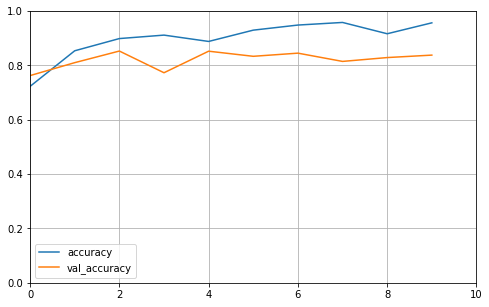

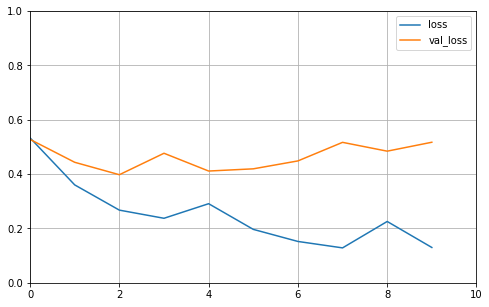

In [13]:
def plot_learning_curves(history, label, epochs, min_value, max_value):
    data = {}
    data[label] = history.history[label]
    data['val_' + label] = history.history['val_' + label]
    pd.DataFrame(data).plot(figsize=(8, 5))
    plt.grid(True)
    plt.axis([0, epochs, min_value, max_value])
    plt.show()


plot_learning_curves(history, 'accuracy', 10, 0, 1)
plot_learning_curves(history, 'loss', 10, 0, 1)

In [14]:
print(bi_lstm_model.evaluate(test_dataset))

391/391 [==============================] - 16s 41ms/step - loss: 0.5171 - accuracy: 0.8377
[0.517119824886322, 0.8376799821853638]
